In [22]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
print(tf.__version__)

2.8.0


In [23]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [24]:
# data is a dict type 
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
# data has 30 different feat col and contains 569 different instances 
print(f"data shape : {data['data'].shape}")
# data is np array type 
type(data["data"])

data shape : (569, 30)


numpy.ndarray

In [26]:
# target is a 1d vector with similar Rows as data 
print(data["target"].shape)
data["target"][:50]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [27]:
# splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data["data"], data["target"], 
                                                    test_size=0.25)

N, D = x_train.shape

In [28]:
# scaling data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# we use training data to get scaling properties to use in all new data later
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
###### building the tf dense model
model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(D,)),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 60)


print("Train score: ", model.evaluate(x_train, y_train))
print("Test score: ", model.evaluate(x_test, y_test))

Epoch 1/60
14/14 [==============================] - 1s 26ms/step - loss: 1.1850 - accuracy: 0.2958 - val_loss: 1.2820 - val_accuracy: 0.2448
Epoch 2/60
14/14 [==============================] - 0s 9ms/step - loss: 1.0773 - accuracy: 0.3662 - val_loss: 1.1523 - val_accuracy: 0.2937
Epoch 3/60
14/14 [==============================] - 0s 9ms/step - loss: 0.9830 - accuracy: 0.4272 - val_loss: 1.0340 - val_accuracy: 0.3706
Epoch 4/60
14/14 [==============================] - 0s 14ms/step - loss: 0.8959 - accuracy: 0.4859 - val_loss: 0.9301 - val_accuracy: 0.4336
Epoch 5/60
14/14 [==============================] - 0s 9ms/step - loss: 0.8188 - accuracy: 0.5282 - val_loss: 0.8410 - val_accuracy: 0.4755
Epoch 6/60
14/14 [==============================] - 0s 10ms/step - loss: 0.7523 - accuracy: 0.5775 - val_loss: 0.7614 - val_accuracy: 0.5385
Epoch 7/60
14/14 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.6197 - val_loss: 0.6915 - val_accuracy: 0.6084
Epoch 8/60
14/14 

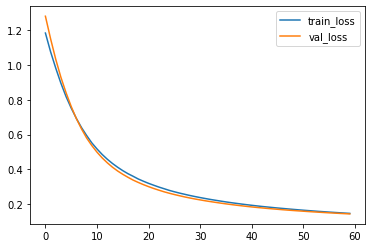

In [43]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

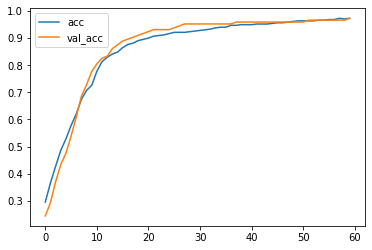

In [44]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()